Autor: ÁLLIFE LICIO LACERDA<BR>
**Utilizando machine learning para determinar qualidade do vinho.**

**Dados:**

https://www.kaggle.com/yasserh/wine-quality-dataset

**Variaveis de entrada:**
    
* fixed acidity
* volatile acidity
* citric acid
* residual sugar
* chlorides
* free sulfur dioxide
* total sulfur dioxide
* density
* pH
* sulphates
* alcohol
* quality

In [124]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [125]:
df = pd.read_csv('Datasets/WineQT.csv')

In [126]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


# Removendo coluna desnecessária (Id)

In [127]:
df.drop('Id', axis = 1, inplace = True)

# Visualizando classes

<AxesSubplot:xlabel='quality', ylabel='count'>

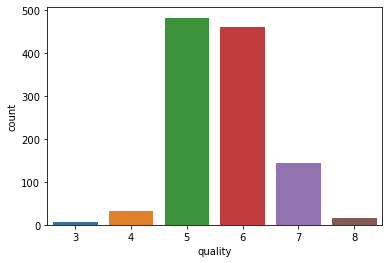

In [128]:
sns.countplot(df.quality)

### Nota: a qualidade é uma pontuação de 0 a 10

In [129]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Verificar se nosso dataset tem linhas duplicadas

In [130]:
df.duplicated().value_counts()

False    1018
True      125
dtype: int64

# Removendo linhas duplicadas

In [131]:
df.drop_duplicates(inplace = True)

# Separando em treino/teste

In [132]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('quality', axis = 1), df['quality'], test_size=0.3)

In [133]:
display(X_train.shape, X_test.shape)

(712, 11)

(306, 11)

In [134]:
display(y_train.shape, y_test.shape)

(712,)

(306,)

# Normalizando os dados de entrada

In [135]:
scaler = MinMaxScaler()

In [136]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Criando classificador com k = 3

In [137]:
MODELO_KNN = KNeighborsClassifier(n_neighbors=3)

# Treinando o modelo

In [138]:
MODELO_KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

# Executando o modelo no conjunto de teste

In [139]:
resultado = MODELO_KNN.predict(X_test)

In [140]:
resultado[:10]

array([6, 5, 6, 5, 5, 5, 6, 7, 5, 5], dtype=int64)

In [141]:
#contando acertos "manualmente"
z = zip(resultado, y_test)
acertos = 0
erros = 0
for a,b in z:
    if a==b:
        acertos+=1
    else:
        erros+=1
print(acertos)
print(erros)

149
157


# Verificando acurácia

In [142]:
print(metrics.classification_report(y_test, resultado))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.17      0.08      0.11        13
           5       0.50      0.69      0.58       118
           6       0.51      0.41      0.45       128
           7       0.44      0.38      0.41        39
           8       0.00      0.00      0.00         7

    accuracy                           0.49       306
   macro avg       0.27      0.26      0.26       306
weighted avg       0.47      0.49      0.47       306



In [143]:
print (pd.crosstab(y_test,resultado, rownames=['Real'], colnames=['          Predito'], margins=True))

          Predito  3  4    5    6   7  All
Real                                      
3                  0  0    1    0   0    1
4                  0  1    4    7   1   13
5                  2  4   81   29   2  118
6                  1  1   62   52  12  128
7                  0  0   13   11  15   39
8                  0  0    1    2   4    7
All                3  6  162  101  34  306


# Utilizamos k=3 no nosso algoritmo KNN e tivemos 50% de acurácia<br>

# Otimizando o parâmetro k com GridSearchCV

In [144]:
from sklearn.model_selection import GridSearchCV

# Definindo uma lista de valores a serem testados

In [145]:
k_list = list(range(1,50))

In [146]:
#transformando em dicionário
k_values = dict(n_neighbors=k_list)
#k_values

# Criando objeto GridSearchCV

In [147]:
grid = GridSearchCV(MODELO_KNN, k_values, cv=5, scoring='accuracy')

In [148]:
x = df.drop('quality', axis=1).values
y = df.quality.values

In [149]:
X = scaler.fit_transform(x)

# Treinando 

In [150]:
grid.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]},
             scoring='accuracy')

# Visualizando os valores de scores

In [151]:
grid.cv_results_

{'mean_fit_time': array([0.00079575, 0.00080047, 0.00080123, 0.00079966, 0.00080013,
        0.00079908, 0.00099916, 0.00100012, 0.00039897, 0.0010004 ,
        0.00080018, 0.00020018, 0.00080047, 0.0010006 , 0.00060043,
        0.00080051, 0.00060034, 0.00040002, 0.0010006 , 0.00080051,
        0.00040035, 0.00080047, 0.00060048, 0.00060034, 0.00060024,
        0.00080605, 0.00098276, 0.00098963, 0.00097675, 0.00100117,
        0.00100102, 0.0008009 , 0.00080066, 0.00060062, 0.00080094,
        0.00100093, 0.00060062, 0.0008008 , 0.00080075, 0.00100121,
        0.00100098, 0.00060067, 0.00100112, 0.00100107, 0.00060058,
        0.00080075, 0.00080056, 0.00080042, 0.00060039]),
 'std_fit_time': array([3.97968978e-04, 4.00233308e-04, 4.00626838e-04, 3.99828256e-04,
        4.00066518e-04, 3.99547019e-04, 1.71528871e-06, 5.09122765e-07,
        4.88641623e-04, 3.60950296e-06, 4.00099008e-04, 4.00352478e-04,
        4.00233336e-04, 2.33601546e-07, 4.90251785e-04, 4.00257281e-04,
        4

# Melhor valor de k

In [152]:
grid.best_params_

{'n_neighbors': 21}

# Melhor acurácia

In [153]:
grid.best_score_

0.5678112624360089

# Agora sabemos que com k = 21 temos 56% de acurácia

# Visualizando a escolha de k

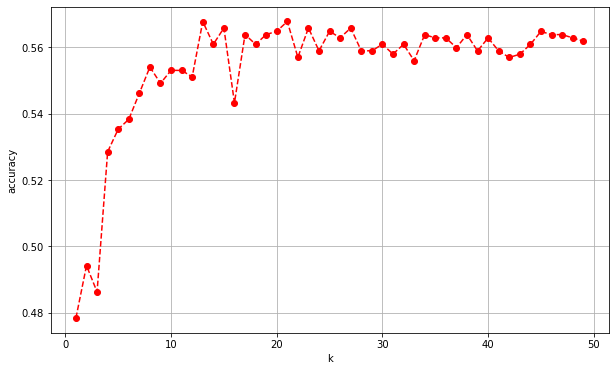

In [154]:
scores = grid.cv_results_['mean_test_score'].tolist()
# Renderizando gráfico
plt.figure(figsize=(10,6))
plt.plot(k_list,scores,color='red',linestyle='dashed',marker='o')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.grid()
plt.show()

# Nota-se que depois de K ~ 14 temos estabilidade. 